In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install basketball_reference_scraper

Note: you may need to restart the kernel to use updated packages.


In [3]:
from basketball_reference_scraper.teams import get_roster, get_team_stats, get_opp_stats, get_roster_stats, get_team_misc
from basketball_reference_scraper.players import get_stats, get_game_logs, get_player_headshot
from basketball_reference_scraper.pbp import get_pbp
from basketball_reference_scraper.box_scores import get_box_scores
from basketball_reference_scraper.pbp import get_pbp
from basketball_reference_scraper.shot_charts import get_shot_chart
from basketball_reference_scraper.injury_report import get_injury_report
from basketball_reference_scraper.drafts import get_draft_class
pd.set_option('display.max_columns', None)

In [4]:
draft_14 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2014_draft_class.csv")
draft_15 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2015_draft_class.csv")
draft_16 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2016_draft_class.csv")
draft_17 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2017_draft_class.csv")
draft_18 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2018_draft_class.csv")
draft_19 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2019_draft_class.csv")
draft_20 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2020_draft_class.csv")
draft_21 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2021_draft_class.csv")
draft_22 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2022_draft_class.csv")
draft_23 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2023_draft_class.csv")
rookies_eff = pd.concat([draft_14,draft_15,draft_16,draft_17,draft_18,draft_19,draft_20,draft_21,draft_22,draft_23])

In [73]:
least_efficient = rookies_eff[(rookies_eff['YEAR'] == 2023) & (rookies_eff['G'] >= 20) & (rookies_eff['MP'] >= 10)].reset_index()
least_efficient = least_efficient.sort_values('PER').reset_index().iloc[:3]
least_efficient

,level_0,index,PLAYER,PICK,TEAM,YEAR,G,MP,FG,FGA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,ADVANCED_WS,ADVANCED_BPM,ADVANCED_VORP,PER
0,25,42,Rayan Rupert,43,POR,2023,39.0,16.2,1.4,4.1,0.5,0.6,0.6,1.7,1.6,0.3,0.1,0.8,1.4,4.0,-0.1,-6.7,-0.8,6.2
1,23,28,Julian Strawther,29,IND,2023,50.0,10.9,1.6,4.4,0.4,0.6,0.1,1.1,0.9,0.3,0.1,0.5,1.1,4.5,0.2,-6.0,-0.6,7.7
2,5,5,Anthony Black,6,ORL,2023,69.0,16.9,1.7,3.6,0.7,1.2,0.5,1.5,1.3,0.5,0.3,0.8,1.6,4.6,1.6,-3.0,-0.3,8.2


In [43]:
rayan = pd.read_csv(r"C:\Users\zecha\Downloads\rayan.xls.csv")
rayan = rayan.dropna(subset=['MP'])
rayan['MP'] = rayan['MP'].str[0:2].str.replace(':', '', regex=False)
rayan['MP']= rayan['MP'].astype(int)
rayan = rayan[(rayan['MP'] >= 10) & (rayan['FGA'] >= 7)]
rayan.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
59,60,19.0,3/4/2024,19-278,POR,@,MIN,L (-5),0,23,5.0,7.0,0.714,3.0,3.0,1.00,0.0,0.0,NaN,1.0,5.0,6.0,0.0,0.0,0.0,1.0,3.0,13.0,10.1,-7.0
71,72,29.0,3/25/2024,19-299,POR,@,HOU,L (-18),1,23,3.0,8.0,0.375,3.0,4.0,0.75,0.0,0.0,NaN,0.0,4.0,4.0,1.0,0.0,0.0,1.0,3.0,9.0,4.3,7.0
74,75,32.0,4/1/2024,19-306,POR,@,ORL,L (-1),1,31,4.0,11.0,0.364,3.0,6.0,0.50,0.0,0.0,NaN,0.0,1.0,1.0,2.0,1.0,0.0,1.0,3.0,11.0,5.4,-11.0
76,77,34.0,4/5/2024,19-310,POR,@,WAS,W (+6),1,31,1.0,8.0,0.125,1.0,5.0,0.20,0.0,0.0,NaN,1.0,6.0,7.0,4.0,2.0,1.0,1.0,5.0,3.0,2.8,1.0
77,78,35.0,4/7/2024,19-312,POR,@,BOS,L (-17),1,33,3.0,8.0,0.375,3.0,6.0,0.50,0.0,0.0,NaN,1.0,2.0,3.0,2.0,1.0,0.0,1.0,3.0,9.0,6.1,-24.0


In [54]:
rayan['PER'] = (0.68+(26.77*rayan.FG)-(35.58*rayan.FGA)+(26.32*rayan.FT)-
                       (25.47*rayan.FTA)+(42.74*rayan.ORB)+(11.45*rayan.DRB)+
                       (29.7*rayan.AST)+(47.3*rayan.STL)+(38*rayan.BLK)-(47.9*rayan.TOV)-
                       (18.8*rayan.PF)+(41.1*rayan.PTS))/rayan.MP
rayan = rayan.sort_values('PER', ascending=False).reset_index().iloc[:4]
rayan

,level_0,index,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,PER
0,0,59,60,19.0,3/4/2024,19-278,POR,@,MIN,L (-5),0,23,5.0,7.0,0.714,3.0,3.0,1.000,0.0,0.0,NaN,1.0,5.0,6.0,0.0,0.0,0.0,1.0,3.0,13.0,10.1,-7.0,18.063478
1,1,81,82,39.0,4/14/2024,19-319,POR,@,SAC,L (-39),1,40,4.0,12.0,0.333,2.0,7.0,0.286,1.0,2.0,0.5,3.0,3.0,6.0,5.0,0.0,0.0,2.0,1.0,11.0,7.9,-25.0,7.618750
2,2,77,78,35.0,4/7/2024,19-312,POR,@,BOS,L (-17),1,33,3.0,8.0,0.375,3.0,6.0,0.500,0.0,0.0,NaN,1.0,2.0,3.0,2.0,1.0,0.0,1.0,3.0,9.0,6.1,-24.0,7.099697
3,3,71,72,29.0,3/25/2024,19-299,POR,@,HOU,L (-18),1,23,3.0,8.0,0.375,3.0,4.0,0.750,0.0,0.0,NaN,0.0,4.0,4.0,1.0,0.0,0.0,1.0,3.0,9.0,4.3,7.0,5.976087


In [60]:
r1 = get_shot_chart('2024-03-04', 'POR', 'MIN')
r1 = r1['POR']
r1 = r1[r1['PLAYER'] == 'Rayan Rupert']
r2 = get_shot_chart('2024-04-14', 'POR', 'SAC')
r2 = r2['POR']
r2 = r2[r2['PLAYER'] == 'Rayan Rupert']
r3= get_shot_chart('2024-04-07', 'POR', 'BOS')
r3 = r3['POR']
r3 = r3[r3['PLAYER'] == 'Rayan Rupert']
rayanshots = pd.concat([r1,r2,r3])
rayanshots['x'] = rayanshots['x'].str.replace(' ft', '')
rayanshots['x'] = pd.to_numeric(rayanshots['x'], errors='coerce')
rayanshots['y'] = rayanshots['y'].str.replace(' ft', '')
rayanshots['y'] = pd.to_numeric(rayanshots['y'], errors='coerce')
rayanshots['x'] = 10 * (rayanshots.x - 25)
rayanshots['y'] = 9.2 * rayanshots.y
rayanshots

C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

,x,y,QUARTER,TIME_REMAINING,PLAYER,MAKE_MISS,VALUE,DISTANCE
13,-28.0,49.404,1,2:09.0,Rayan Rupert,MAKE,2,3 ft
14,-38.0,91.540,1,2:00.0,Rayan Rupert,MISS,2,8 ft
16,-125.0,68.632,1,0:55.0,Rayan Rupert,MISS,2,12 ft
22,10.0,66.792,2,10:42.0,Rayan Rupert,MAKE,2,5 ft
57,-191.1,174.800,3,5:16.0,Rayan Rupert,MAKE,3,24 ft
77,-236.0,35.696,4,7:03.0,Rayan Rupert,MAKE,3,23 ft
78,-220.0,139.840,4,5:55.0,Rayan Rupert,MAKE,3,24 ft
2,-195.0,187.680,1,10:36.0,Rayan Rupert,MISS,3,25 ft
28,220.0,130.640,2,11:33.0,Rayan Rupert,MISS,3,26 ft
34,-53.0,42.136,2,8:40.0,Rayan Rupert,MAKE,2,5 ft


In [61]:
rmade_shots = rayanshots[rayanshots['MAKE_MISS'] == 'MAKE']
rmissed_shots = rayanshots[rayanshots['MAKE_MISS'] == 'MISS']

In [23]:
julian = pd.read_csv(r"C:\Users\zecha\Downloads\julian.xls.csv")
julian = julian.dropna(subset=['MP'])
julian['MP'] = julian['MP'].str[0:2].str.replace(':', '', regex=False)
julian['MP']= julian['MP'].astype(int)
julian = julian[julian['MP'] >= 10]

In [26]:
julian['PER'] = (0.68+(26.77*julian.FG)-(35.58*julian.FGA)+(26.32*julian.FT)-
                       (25.47*julian.FTA)+(42.74*julian.ORB)+(11.45*julian.DRB)+
                       (29.7*julian.AST)+(47.3*julian.STL)+(38*julian.BLK)-(47.9*julian.TOV)-
                       (18.8*julian.PF)+(41.1*julian.PTS))/julian.MP
julian = julian.sort_values('PER', ascending=False).reset_index().iloc[:4]
julian

,index,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,PER
0,7,8,6.0,11/6/2023,21-202,DEN,NaN,NOP,W (+18),0,19,8.0,13.0,0.615,5.0,9.0,0.556,0.0,1.0,0.00,0.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,21.0,14.6,-7.0,30.306842
1,23,24,21.0,12/11/2023,21-237,DEN,@,ATL,W (+7),0,28,8.0,16.0,0.500,6.0,11.0,0.545,0.0,0.0,NaN,0.0,1.0,1.0,2.0,5.0,0.0,2.0,1.0,22.0,18.3,-4.0,26.518214
2,24,25,22.0,12/12/2023,21-238,DEN,@,CHI,W (+8),0,22,4.0,9.0,0.444,2.0,5.0,0.400,6.0,8.0,0.75,0.0,6.0,6.0,3.0,1.0,0.0,2.0,1.0,16.0,13.0,12.0,22.263636
3,28,29,26.0,12/20/2023,21-246,DEN,@,TOR,W (+9),0,13,3.0,6.0,0.500,1.0,4.0,0.250,0.0,0.0,NaN,0.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,7.0,6.9,1.0,21.773846


In [27]:
j1 = get_shot_chart('2023-11-06', 'DEN', 'NOP')
j1 = j1['DEN']
j1 = j1[j1['PLAYER'] == 'Julian Strawther']
j2 = get_shot_chart('2023-12-11', 'DEN', 'ATL')
j2 = j2['DEN']
j2 = j2[j2['PLAYER'] == 'Julian Strawther']
j3 = get_shot_chart('2023-12-12', 'DEN', 'CHI')
j3 = j3['DEN']
j3 = j3[j3['PLAYER'] == 'Julian Strawther']
julianshots = pd.concat([j1,j2,j3])
julianshots['x'] = julianshots['x'].str.replace(' ft', '')
julianshots['x'] = pd.to_numeric(julianshots['x'], errors='coerce')
julianshots['y'] = julianshots['y'].str.replace(' ft', '')
julianshots['y'] = pd.to_numeric(julianshots['y'], errors='coerce')
julianshots['x'] = 10 * (julianshots.x - 25)
julianshots['y'] = 9.2 * julianshots.y
julianshots.head()

C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

,x,y,QUARTER,TIME_REMAINING,PLAYER,MAKE_MISS,VALUE,DISTANCE
31,168.0,205.16,2,9:28.0,Julian Strawther,MISS,3,26 ft
33,-121.0,253.00,2,8:42.0,Julian Strawther,MAKE,3,27 ft
41,153.0,241.96,2,4:09.0,Julian Strawther,MAKE,3,29 ft
42,168.0,231.84,2,3:33.0,Julian Strawther,MAKE,3,29 ft
74,146.0,222.64,4,11:37.0,Julian Strawther,MISS,3,26 ft


In [28]:
jmade_shots = julianshots[julianshots['MAKE_MISS'] == 'MAKE']
jmissed_shots = julianshots[julianshots['MAKE_MISS'] == 'MISS']

In [39]:
anthony = pd.read_csv(r"C:\Users\zecha\Downloads\anthony.xls.csv")
anthony = anthony.dropna(subset=['MP'])
anthony['MP'] = anthony['MP'].str[0:2].str.replace(':', '', regex=False)
anthony['MP']= anthony['MP'].astype(int)
anthony = anthony[(anthony['MP'] >= 10) & (anthony['FGA'] >= 7)]
# anthony.head()

In [48]:
anthony['PER'] = (0.68+(26.77*anthony.FG)-(35.58*anthony.FGA)+(26.32*anthony.FT)-
                       (25.47*anthony.FTA)+(42.74*anthony.ORB)+(11.45*anthony.DRB)+
                       (29.7*anthony.AST)+(47.3*anthony.STL)+(38*anthony.BLK)-(47.9*anthony.TOV)-
                       (18.8*anthony.PF)+(41.1*anthony.PTS))/anthony.MP
anthony = anthony.sort_values('PER', ascending=False).reset_index().iloc[:4]
anthony

,level_0,index,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,PER
0,0,23,24,22.0,12/15/2023,19-329,ORL,@,BOS,L (-17),1,28,5.0,8.0,0.625,3.0,5.0,0.600,0.0,0.0,NaN,3.0,6.0,9.0,4.0,0.0,0.0,0.0,2.0,13.0,15.3,0.0,23.653929
1,1,46,47,44.0,1/29/2024,20-009,ORL,@,DAL,L (-2),0,30,7.0,9.0,0.778,4.0,4.0,1.000,2.0,2.0,1.0,0.0,3.0,3.0,1.0,0.0,1.0,1.0,3.0,20.0,16.6,-11.0,22.976667
2,2,28,29,27.0,12/26/2023,19-340,ORL,@,WAS,W (+8),1,32,9.0,13.0,0.692,4.0,6.0,0.667,1.0,1.0,1.0,1.0,5.0,6.0,1.0,4.0,0.0,5.0,4.0,23.0,17.8,-2.0,22.794063
3,3,33,34,32.0,1/3/2024,19-348,ORL,@,SAC,L (-3),0,24,4.0,7.0,0.571,1.0,1.0,1.000,0.0,0.0,NaN,1.0,1.0,2.0,4.0,0.0,0.0,1.0,1.0,9.0,8.1,-1.0,13.953750


In [49]:
a1 = get_shot_chart('2023-12-15', 'ORL', 'BOS')
a1 = a1['ORL']
a1 = a1[a1['PLAYER'] == 'Anthony Black']
a2 = get_shot_chart('2024-01-29', 'ORL', 'DAL')
a2 = a2['ORL']
a2 = a2[a2['PLAYER'] == 'Anthony Black']
a3 = get_shot_chart('2023-12-26', 'ORL', 'WAS')
a3 = a3['ORL']
a3 = a3[a3['PLAYER'] == 'Anthony Black']
anthonyshots = pd.concat([a1,a2,a3])
anthonyshots['x'] = anthonyshots['x'].str.replace(' ft', '')
anthonyshots['x'] = pd.to_numeric(anthonyshots['x'], errors='coerce')
anthonyshots['y'] = anthonyshots['y'].str.replace(' ft', '')
anthonyshots['y'] = pd.to_numeric(anthonyshots['y'], errors='coerce')
anthonyshots['x'] = 10 * (anthonyshots.x - 25)
anthonyshots['y'] = 9.2 * anthonyshots.y
anthonyshots.head()

C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(shot_df)
C:\Users\zecha\anaconda3\envs\geospatial\lib\site-packages\basketball_reference_scraper\shot_charts.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

,x,y,QUARTER,TIME_REMAINING,PLAYER,MAKE_MISS,VALUE,DISTANCE
13,2.0,53.084,1,4:49.0,Anthony Black,MAKE,2,3 ft
39,155.0,222.640,2,0:54.0,Anthony Black,MAKE,3,27 ft
49,221.0,20.148,3,5:55.0,Anthony Black,MISS,3,23 ft
54,-10.0,27.416,3,5:22.0,Anthony Black,MAKE,2,0 ft
58,220.0,38.456,3,4:02.0,Anthony Black,MISS,3,23 ft


In [50]:
amade_shots = anthonyshots[anthonyshots['MAKE_MISS'] == 'MAKE']
amissed_shots = anthonyshots[anthonyshots['MAKE_MISS'] == 'MISS']

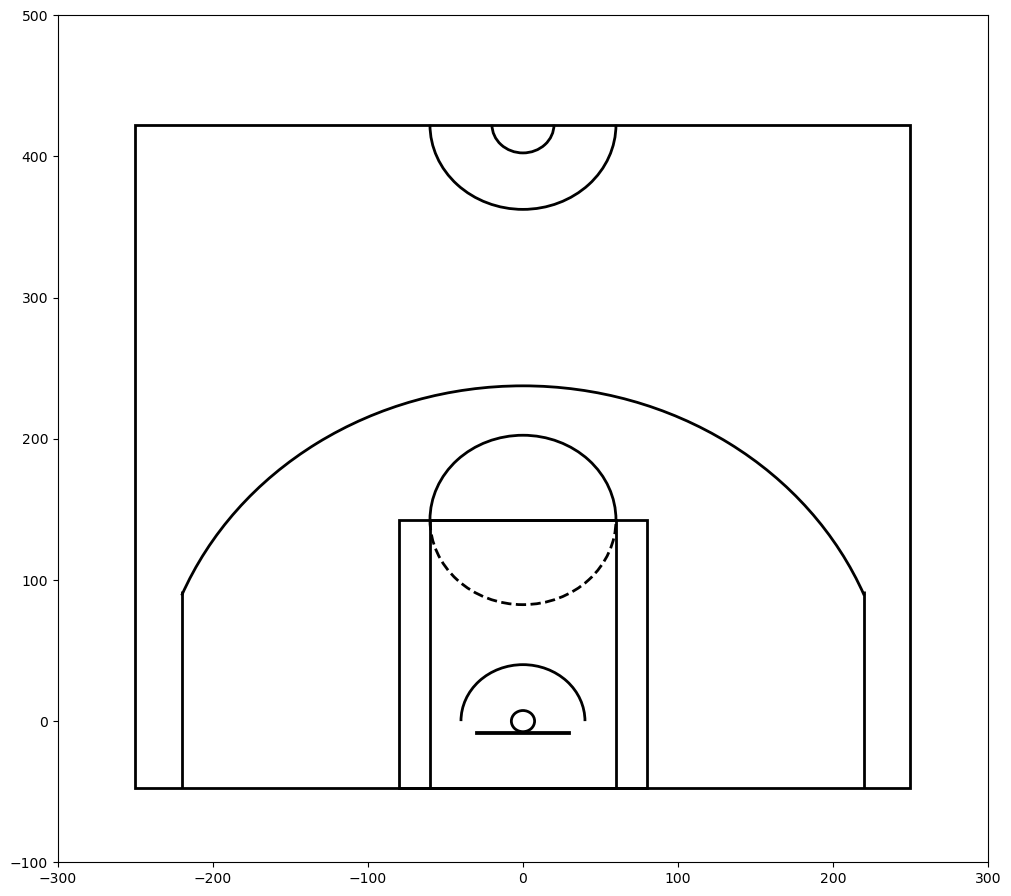

In [35]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

# Code to make basketball court
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

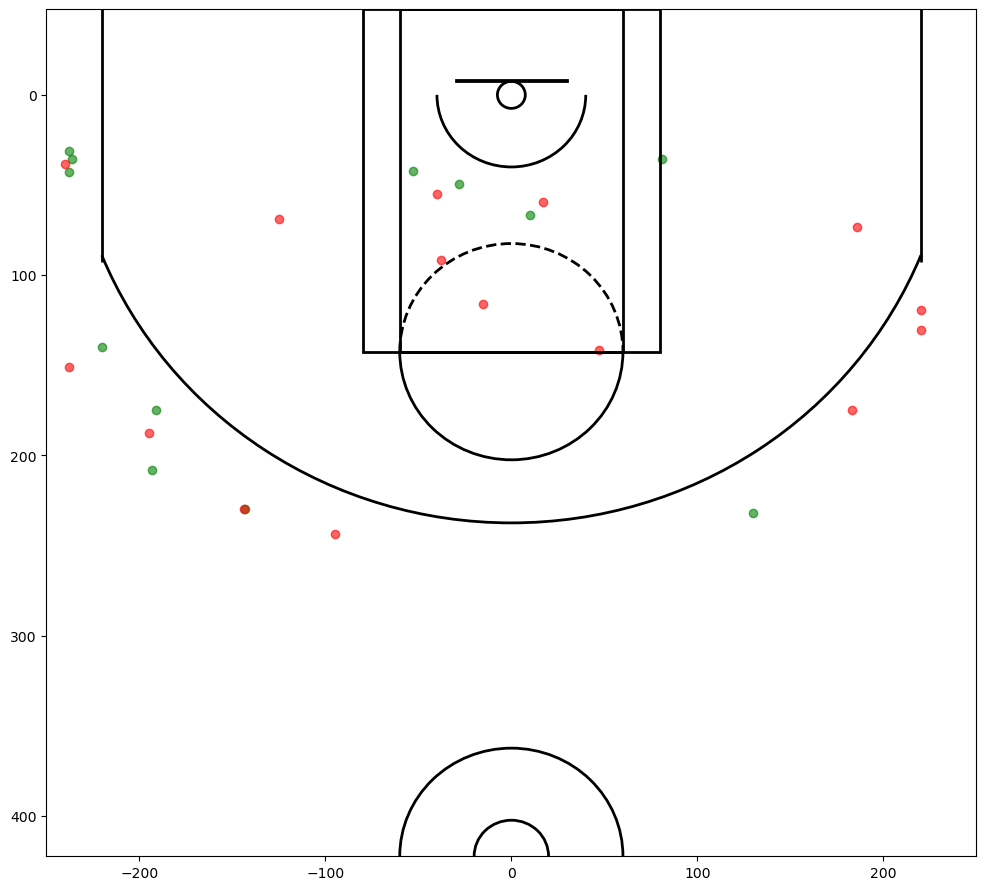

In [66]:
plt.figure(figsize=(12,11))
#plt.scatter(victor.x, victor.y)
plt.scatter(rmade_shots['x'], rmade_shots['y'], color='green', label='Made Shot', alpha=0.6)
plt.scatter(rmissed_shots['x'], rmissed_shots['y'], color='red', label='Missed Shot', alpha=0.6)
draw_court()
# Descending values along the axis from left to right
plt.xlim(-250,250)
plt.ylim(422.5,-47.5)
plt.savefig(r'C:\da12\projects\capstone\capstone_DA12_NBA\rayan_shots.jpg')
plt.show()

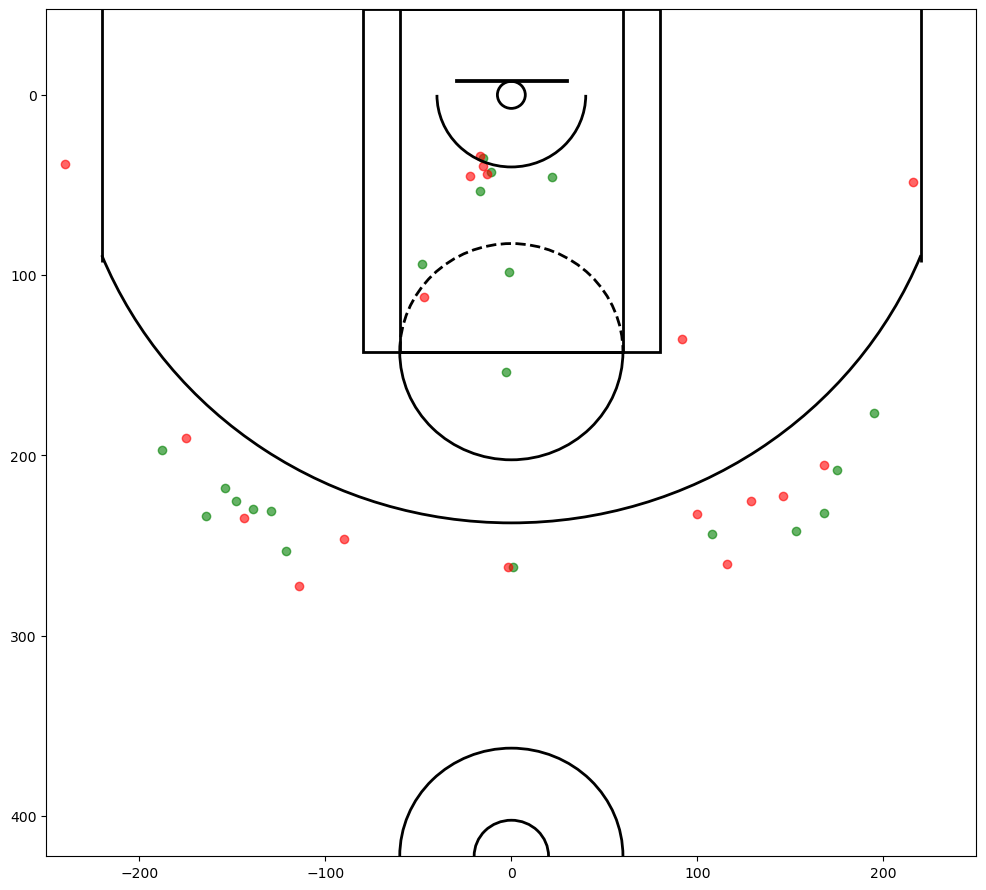

In [67]:
plt.figure(figsize=(12,11))
#plt.scatter(victor.x, victor.y)
plt.scatter(jmade_shots['x'], jmade_shots['y'], color='green', label='Made Shot', alpha=0.6)
plt.scatter(jmissed_shots['x'], jmissed_shots['y'], color='red', label='Missed Shot', alpha=0.6)
draw_court()
# Descending values along the axis from left to right
plt.xlim(-250,250)
plt.ylim(422.5,-47.5)
plt.savefig(r'C:\da12\projects\capstone\capstone_DA12_NBA\julian_shots.jpg')
plt.show()

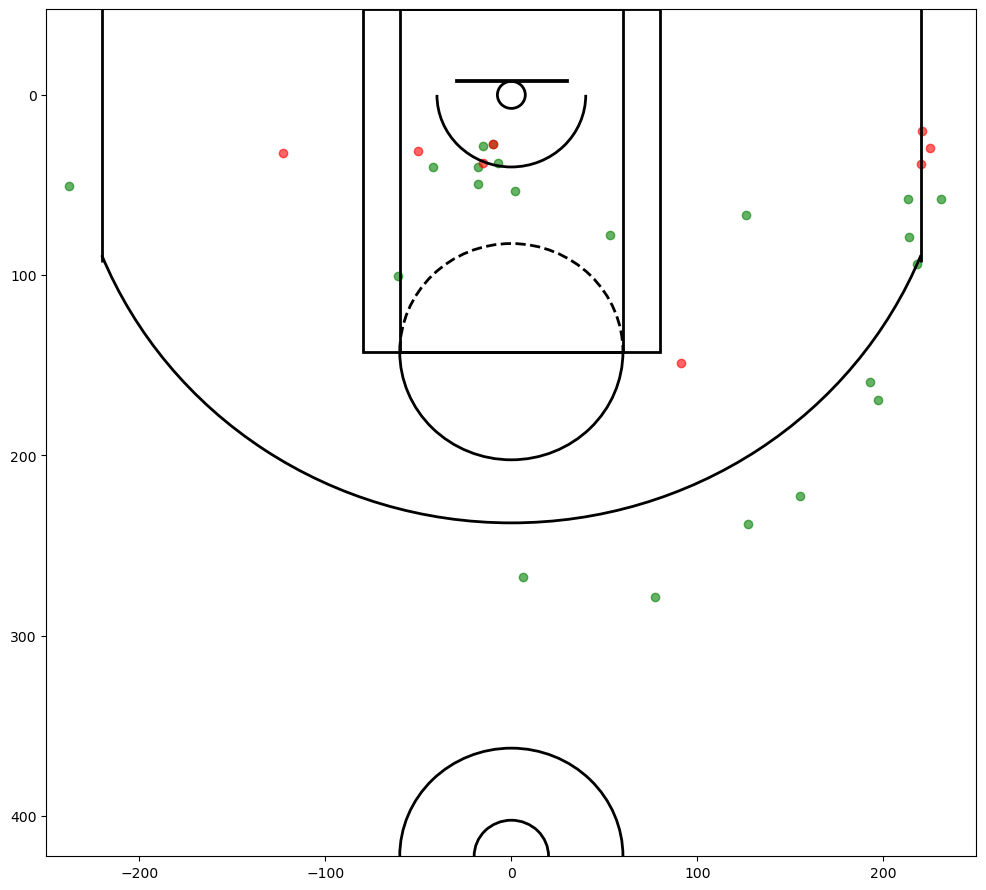

In [68]:
plt.figure(figsize=(12,11))
#plt.scatter(victor.x, victor.y)
plt.scatter(amade_shots['x'], amade_shots['y'], color='green', label='Made Shot', alpha=0.6)
plt.scatter(amissed_shots['x'], amissed_shots['y'], color='red', label='Missed Shot', alpha=0.6)
draw_court()
# Descending values along the axis from left to right
plt.xlim(-250,250)
plt.ylim(422.5,-47.5)
plt.savefig(r'C:\da12\projects\capstone\capstone_DA12_NBA\anthony_shots.jpg')
plt.show()

In [75]:
least_efficient_per = least_efficient.mean()
least_efficient_per

C:\Users\zecha\AppData\Local\Temp\ipykernel_5912\803126009.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  least_efficient_per = least_efficient.mean()


level_0            17.666667
index              25.000000
PICK               26.000000
YEAR             2023.000000
G                  52.666667
MP                 14.666667
FG                  1.566667
FGA                 4.033333
FT                  0.533333
FTA                 0.800000
ORB                 0.400000
DRB                 1.433333
AST                 1.266667
STL                 0.366667
BLK                 0.166667
TOV                 0.700000
PF                  1.366667
PTS                 4.366667
ADVANCED_WS         0.566667
ADVANCED_BPM       -5.233333
ADVANCED_VORP      -0.566667
PER                 7.366667
dtype: float64